In [52]:
import os
import cv2
import numpy as np

dir_path = './datasets/TK_1'

def load_dataset():
    # Load images and labels
    images = []
    labels = []

    shape = (116, 116)
    
    for filename in os.listdir(os.path.join(dir_path)):
        img = cv2.imread(os.path.join(dir_path, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None and img.shape == shape:
            images.append(img)
            
            if 'false' in filename:
                labels.append(0)
            else:
                labels.append(1)
    
    X = np.array(images)
    y = np.array(labels)
    
    X = X[..., np.newaxis]
    
    return X, y

In [53]:
X, y = load_dataset()

X.shape, y.shape

((117, 116, 116, 1), (117,))

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalMaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

# Create a CNN model
model = Sequential()

# Add a convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(116, 116, 1)))

# Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another convolution layer
model.add(Conv2D(64, kernel_size=3, activation='relu'))

# Add another max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the tensor output from the previous layer
model.add(Flatten())
# Replace the Flatten layer with GlobalMaxPooling2D
# model.add(GlobalMaxPooling2D())

# Add a dense layer
model.add(Dense(64, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
3/3 [==============================] - 5s 1s/step - loss: 102.4630 - accuracy: 0.4624 - val_loss: 172.6687 - val_accuracy: 0.5417
Epoch 2/15
3/3 [==============================] - 2s 760ms/step - loss: 77.6092 - accuracy: 0.5699 - val_loss: 38.7562 - val_accuracy: 0.4583
Epoch 3/15
3/3 [==============================] - 2s 783ms/step - loss: 18.8393 - accuracy: 0.4624 - val_loss: 1.8310 - val_accuracy: 0.7500
Epoch 4/15
3/3 [==============================] - 3s 947ms/step - loss: 1.2943 - accuracy: 0.7957 - val_loss: 0.9955 - val_accuracy: 0.7500
Epoch 5/15
3/3 [==============================] - 3s 953ms/step - loss: 0.1977 - accuracy: 0.8817 - val_loss: 0.6452 - val_accuracy: 0.9167
Epoch 6/15
3/3 [==============================] - 2s 789ms/step - loss: 0.0921 - accuracy: 0.9677 - val_loss: 0.5820 - val_accuracy: 0.8750
Epoch 7/15
3/3 [==============================] - 2s 769ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.7365 - val_accuracy: 0.8750
Epoch 8/15
3/3 [

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 114, 114, 64)      640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 57, 57, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 55, 55, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 27, 27, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 46656)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.7323 - accuracy: 0.8750 - 184ms/epoch - 184ms/step


In [59]:
y_pred = model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 328ms/step


(24, 1)

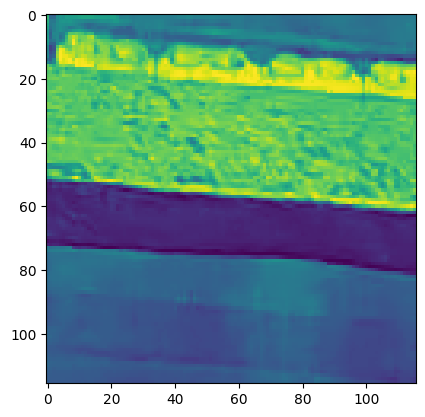

0 [2.321718e-16]


In [60]:
import matplotlib.pyplot as plt

i = 1

plt.imshow(X_test[i])
plt.show()

print(y_test[i], y_pred[i])

In [61]:
model.save('models/model_tk_v1.h5')

In [62]:
from tensorflow.keras.models import load_model

loaded_model = load_model('models/model_tk_v1.h5')